# Data visualistation with matplotlib


## 1. Import matplotlib modules

In [5]:
import numpy as np 
import math 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
from matplotlib.colors import LogNorm 
import scipy as sp 
import tkinter 
from tkinter import filedialog 
import sys

Matplotlib has many different backends, usually its fine to stick to the default. But sometimes it is necessary to change the backend (before importing the plotting module ```pyplot```). The full list of available backends reads:

[u'pgf', u'cairo', u'MacOSX', u'CocoaAgg', u'gdk', u'ps', u'GTKAgg', u'nbAgg', u'GTK', u'Qt5Agg', u'template', u'emf', u'GTK3Cairo', u'GTK3Agg', u'WX', u'Qt4Agg', u'TkAgg', u'agg', u'svg', u'GTKCairo', u'WXAgg', u'WebAgg', u'pdf']

When working from within a jupyter notebook, we can choose *matplotlib* backend with a magic function

In [6]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [7]:
%matplotlib inline
#% matplotlib notebook

Now, we import ```pyplot``` the main plotting module of *matplotlib*

In [8]:
import matplotlib.pyplot as plt

## 2. The default plot

Let's create some data (normal distribution)

In [9]:
import numpy as np
data = np.random.normal(loc=5., scale=2., size=(10000,))

and plot a simple histogram of our data

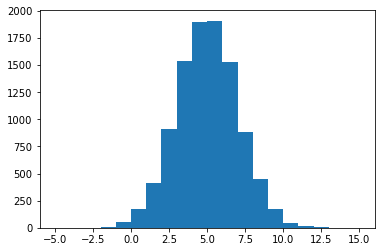

In [11]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(data, range=(-5,15), bins=20)
plt.show()

## 3. Adding more to the plot

First, we are going to fit a Gaussian profile to our function

In [12]:
from scipy.stats import norm
mu,sigma = norm.fit(data)

and plot it on top of our histogram

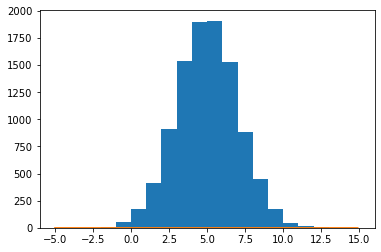

In [13]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(data, range=(-5,15), bins=20)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma))
plt.show()

let's make a bit easier to read (colors, legends, axis lables, etc..)

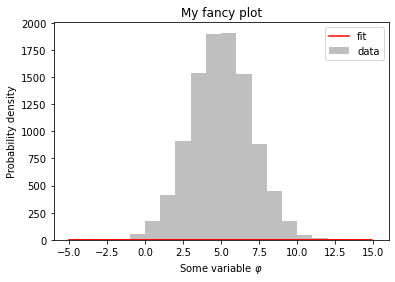

In [14]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, label='data', color='0.75', lw=0.2)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.set_ylabel(r'Probability density')
ax.legend(loc=1)
plt.show()

## 4. My custom plot

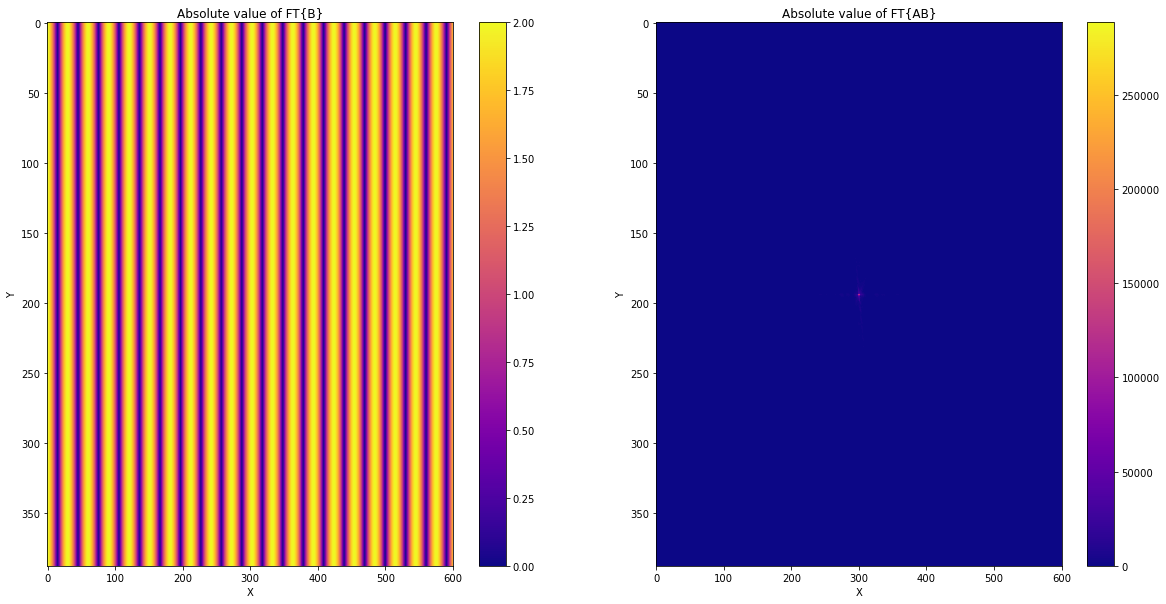

In [5]:
root = tkinter.Tk() 
root.withdraw() 

file_phd = filedialog.askopenfilename() 
image_phd = mpimg.imread(file_phd) 

r, g, b = image_phd[:,:,0], image_phd[:,:,1], image_phd[:,:,2]
image_phd_concat = 0.2990 * r + 0.5870 * g + 0.1140 * b

FT_image_phd = np.fft.fft2(image_phd_concat) 

FT_image_amp = np.real(np.sqrt(np.multiply(FT_image_phd, np.conj(FT_image_phd)))) 
FT_image_int = FT_image_amp ** 2

delta_x = 0.033
delta_y = 0 
shape_array = np.shape(FT_image_amp) 
s_y = shape_array[0]
s_x = shape_array[1] 
B = np.zeros((s_y , s_x) , dtype = complex) 

for i_col in range(0 , s_x , 1):
    B[: , i_col] = 1 + np.exp(-2 * math.pi * 1j * delta_x * i_col)

amplitude_B = np.real(np.sqrt(np.multiply(B,np.conj(B))))
intensity_B = np.real(amplitude_B ** 2)

A_B = np.multiply(FT_image_phd , B) 
amp_A_B = np.fft.fftshift(abs(A_B))

fig_sub ,  (ax_1 , ax_2) = plt.subplots(1 , 2 ,  figsize = (20 , 10))

sf_1 = ax_1.imshow(amplitude_B , aspect = 'auto' , cmap = 'plasma')
fig_sub.colorbar(sf_1 , ax = ax_1) 
ax_1.title.set_text('Absolute value of FT{B}') 
ax_1.set(xlabel = 'X' , ylabel = 'Y')

sf_2 = ax_2.imshow(amp_A_B , aspect = 'auto' , cmap = 'plasma')
fig_sub.colorbar(sf_2 , ax = ax_2)
ax_2.title.set_text('Absolute value of FT{AB}')
_ = ax_2.set(xlabel = 'X' , ylabel = 'Y') 

## 5. Saving the plot as a PDF

In [ ]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, normed=True, label='data', color='0.75', lw=0.2)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.legend(loc=2, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom='on', top='off')
ax.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')
fig.savefig('my_fancy_plot.pdf', format='pdf', bbox_inches='tight')